In [1]:
import dill
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML

import seaborn as sns

def get_model_info(m_string):
    parts = m_string.split(".")[0].split("_")
    algo = parts[2]
    softmax = parts[3]
    window_size = parts[4].split("-")[1]
    emb_size = parts[5].split("-")[1]
    return "{}, {}, window: {}, embedding: {}".format(algo.upper(), softmax.upper(), window_size, emb_size)

# Breast cancer

,Model,AUC mean
12,vectors_patient2vec_pvdbow_hs_win-5_emb-100.dill,0.844385


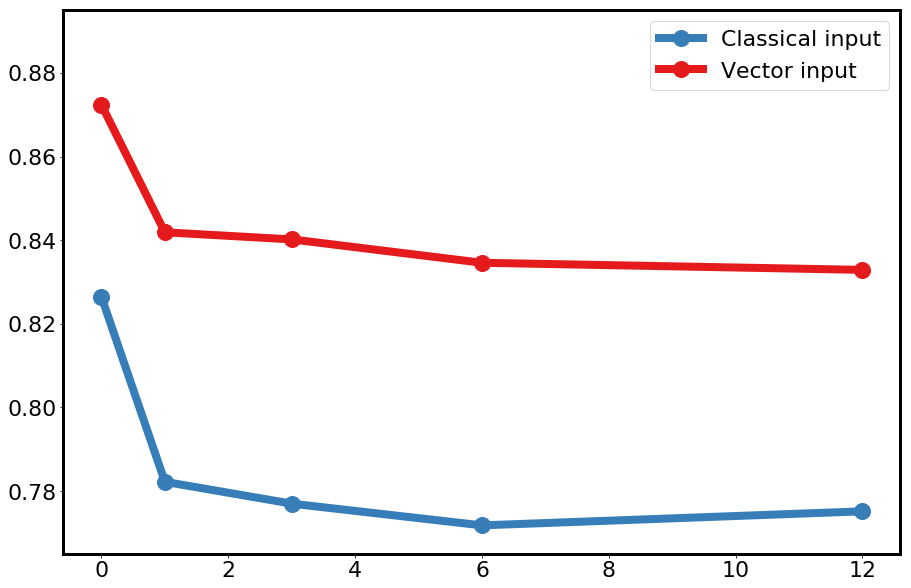

In [2]:
counts_elastic_results = pd.read_csv('../breast_cancer/log/breast_cancer_counts_optimized_elasticnet.log', header=None)
counts_elastic_results.columns = ['Months', 'AUC', 'Logloss']

vectors_elastic_results = pd.read_csv('../breast_cancer/log/breast_cancer_vectors_optimized_elasticnet.log', header=None)
vectors_elastic_results.columns = ['Model', 'Months', 'AUC', 'Logloss']

matplotlib.rcParams.update({'font.size': 22})


vectors_elastic_results_model_groups = vectors_elastic_results.groupby(by='Model')
vactors_elastic_average_auc = pd.DataFrame.from_records([(model, vals['AUC'].mean()) for model, vals in vectors_elastic_results_model_groups], columns=['Model','AUC mean'])
display(vactors_elastic_average_auc.sort_values('AUC mean', ascending=False)[0:1])
top_elastic_models_by_mean = vactors_elastic_average_auc.sort_values('AUC mean', ascending=False)[0:4]['Model'].values


matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)

f = plt.figure()
plt.setp(plt.gca().spines.values(), linewidth=3)
plt.plot(counts_elastic_results['Months'], counts_elastic_results['AUC'], linewidth=8.0, marker="o", ms=16, label='Classical input', color='#377eb8')

for i, model in enumerate(top_elastic_models_by_mean):
    df = vectors_elastic_results_model_groups.get_group(model)
    plt.plot(df['Months'], df['AUC'],  linewidth=8.0, marker="o", label='Vector input', ms=16, color='#E41A1C')
    break
# plt.xlabel('Months before')
# plt.ylabel('AUC')
plt.ylim([0.765, 0.895])
plt.legend(loc='upper right')
plt.show()
f.savefig("images/breast_cancer_elastic.pdf", bbox_inches='tight')

,Model,AUC mean
0,vectors_patient2vec_pvdbow_hs_win-30_emb-100.dill,0.852082


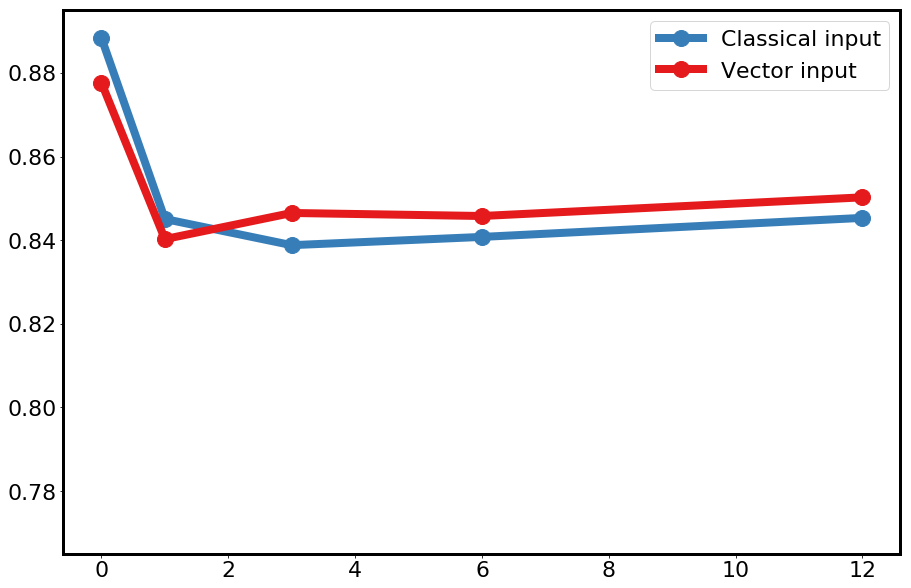

In [3]:
counts_monthly_optim_results = pd.read_csv('../breast_cancer/log/breast_cancer_counts_optimized_xgb.log', header=None)
counts_monthly_optim_results.columns = ['Months', 'AUC', 'Logloss']


vectors_monthly_optim_results = pd.read_csv('../breast_cancer/log/breast_cancer_vectors_monthly_optimized_xgb.log', header=None)
vectors_monthly_optim_results.columns = ['Model', 'Months', 'AUC', 'Logloss']

display(HTML("<h3>Top vector-based models by average score (avreage for all months)</h3>"))
vectors_monthly_optim_results_model_groups = vectors_monthly_optim_results.groupby(by='Model')
vactors_monthly_optim_average_auc = pd.DataFrame.from_records([(model, vals['AUC'].mean()) for model, vals in vectors_monthly_optim_results_model_groups], columns=['Model','AUC mean'])
display(vactors_monthly_optim_average_auc.sort_values('AUC mean', ascending=False)[0:1])
top_monthly_optim_models_by_mean = vactors_monthly_optim_average_auc.sort_values('AUC mean', ascending=False)[0:5]['Model'].values


matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
f = plt.figure()
plt.setp(plt.gca().spines.values(), linewidth=3)
plt.plot(counts_monthly_optim_results['Months'], counts_monthly_optim_results['AUC'], linewidth=8.0, marker="o", ms=16, label='Classical input', color='#377eb8')

# for i, model in enumerate( np.unique(vectors_monthly_optim_results['Model'].values) ):
for i, model in enumerate(top_monthly_optim_models_by_mean):
    df = vectors_monthly_optim_results_model_groups.get_group(model)
    plt.plot(df['Months'], df['AUC'],  linewidth=8.0, marker="o", label='Vector input', ms=16, color='#E41A1C')
    break
plt.legend(loc='upper right')
# plt.xlabel('Months before')
# plt.ylabel('AUC')
plt.ylim([0.765, 0.895])
plt.show()
f.savefig("images/breast_cancer_xgb.pdf", bbox_inches='tight')

# Metformin use

,Model,AUC mean
13,vectors_patient2vec_pvdbow_hs_win-5_emb-300.dill,0.897944


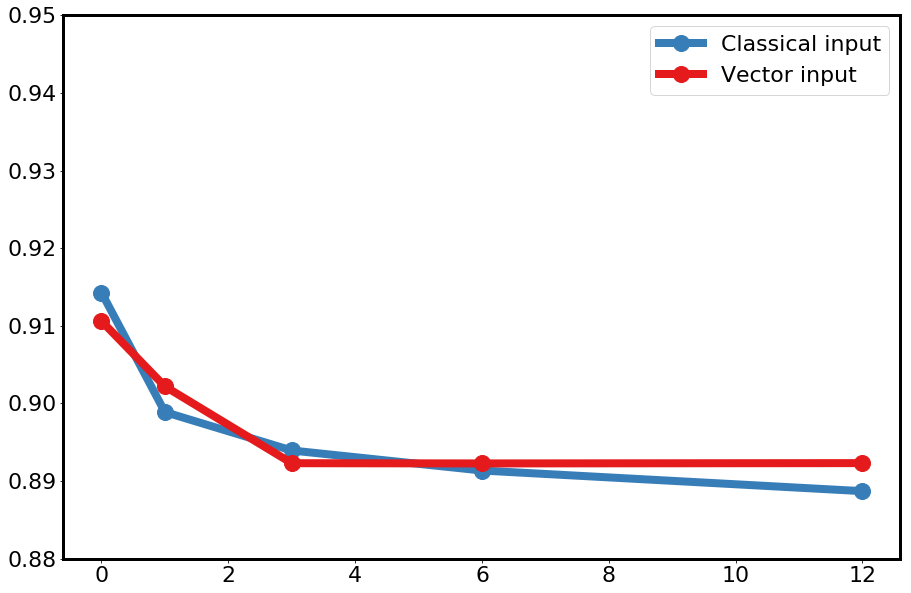

In [4]:
counts_elastic_results = pd.read_csv('../diabetes/log/diabetes_counts_optimized_elasticnet.log', header=None)
counts_elastic_results.columns = ['Months', 'AUC', 'Logloss']

vectors_elastic_results = pd.read_csv('../diabetes/log/diabetes_vectors_optimized_elasticnet.log', header=None)
vectors_elastic_results.columns = ['Model', 'Months', 'AUC', 'Logloss']

matplotlib.rcParams.update({'font.size': 22})


vectors_elastic_results_model_groups = vectors_elastic_results.groupby(by='Model')
vactors_elastic_average_auc = pd.DataFrame.from_records([(model, vals['AUC'].mean()) for model, vals in vectors_elastic_results_model_groups], columns=['Model','AUC mean'])
display(vactors_elastic_average_auc.sort_values('AUC mean', ascending=False)[0:1])
top_elastic_models_by_mean = vactors_elastic_average_auc.sort_values('AUC mean', ascending=False)[0:4]['Model'].values


matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)

f = plt.figure()
plt.setp(plt.gca().spines.values(), linewidth=3)
plt.plot(counts_elastic_results['Months'], counts_elastic_results['AUC'], linewidth=8.0, marker="o", ms=16, label='Classical input', color='#377eb8')

for i, model in enumerate(top_elastic_models_by_mean):
    df = vectors_elastic_results_model_groups.get_group(model)
    plt.plot(df['Months'], df['AUC'],  linewidth=8.0, marker="o", label='Vector input', ms=16, color='#E41A1C')
    break
# plt.xlabel('Months before')
# plt.ylabel('AUC')
plt.ylim([0.88, 0.95])
plt.legend(loc='upper right')
plt.show()
f.savefig("images/diabetes_elastic.pdf", bbox_inches='tight')

,Model,AUC mean
2,vectors_patient2vec_pvdbow_hs_win-50_emb-100.dill,0.912192


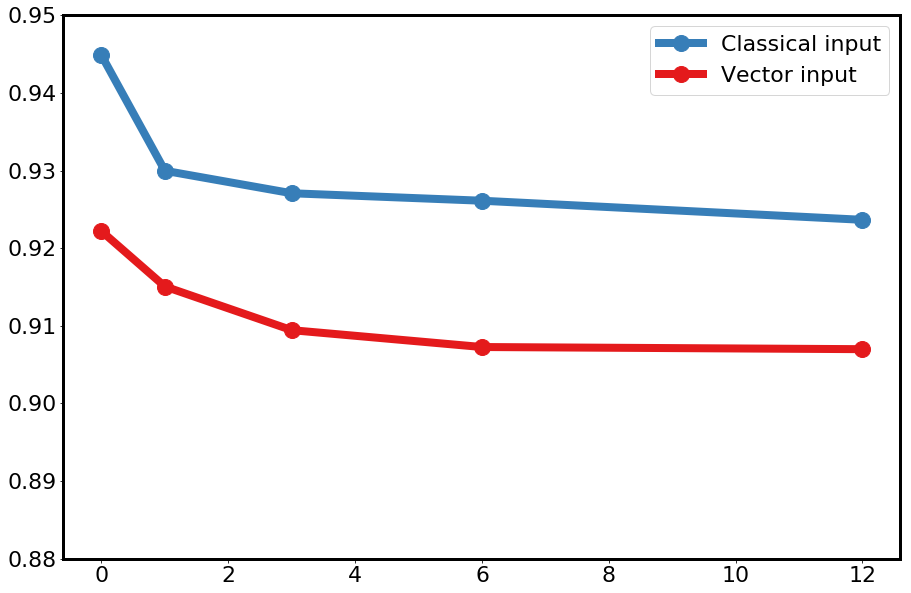

In [5]:
counts_monthly_optim_results = pd.read_csv('../diabetes/log/diabetes_counts_monthly_optimized_xgb.log', header=None)
counts_monthly_optim_results.columns = ['Months', 'AUC', 'Logloss']


vectors_monthly_optim_results = pd.read_csv('../diabetes/log/diabetes_vectors_monthly_optimized_xgb.log', header=None)
vectors_monthly_optim_results.columns = ['Model', 'Months', 'AUC', 'Logloss']

display(HTML("<h3>Top vector-based models by average score (avreage for all months)</h3>"))
vectors_monthly_optim_results_model_groups = vectors_monthly_optim_results.groupby(by='Model')
vactors_monthly_optim_average_auc = pd.DataFrame.from_records([(model, vals['AUC'].mean()) for model, vals in vectors_monthly_optim_results_model_groups], columns=['Model','AUC mean'])
display(vactors_monthly_optim_average_auc.sort_values('AUC mean', ascending=False)[0:1])
top_monthly_optim_models_by_mean = vactors_monthly_optim_average_auc.sort_values('AUC mean', ascending=False)[0:5]['Model'].values


matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
f = plt.figure()
plt.setp(plt.gca().spines.values(), linewidth=3)
plt.plot(counts_monthly_optim_results['Months'], counts_monthly_optim_results['AUC'], linewidth=8.0, marker="o", ms=16, label='Classical input', color='#377eb8')

# for i, model in enumerate( np.unique(vectors_monthly_optim_results['Model'].values) ):
for i, model in enumerate(top_monthly_optim_models_by_mean):
    df = vectors_monthly_optim_results_model_groups.get_group(model)
    plt.plot(df['Months'], df['AUC'],  linewidth=8.0, marker="o", label='Vector input', ms=16, color='#E41A1C')
    break
plt.legend(loc='upper right')
# plt.xlabel('Months before')
# plt.ylabel('AUC')
plt.ylim([0.88, 0.95])
plt.show()
f.savefig("images/diabetes_xgb.pdf", bbox_inches='tight')

# Lung cancer

,Model,AUC mean
13,vectors_patient2vec_pvdbow_hs_win-5_emb-300.dill,0.742398


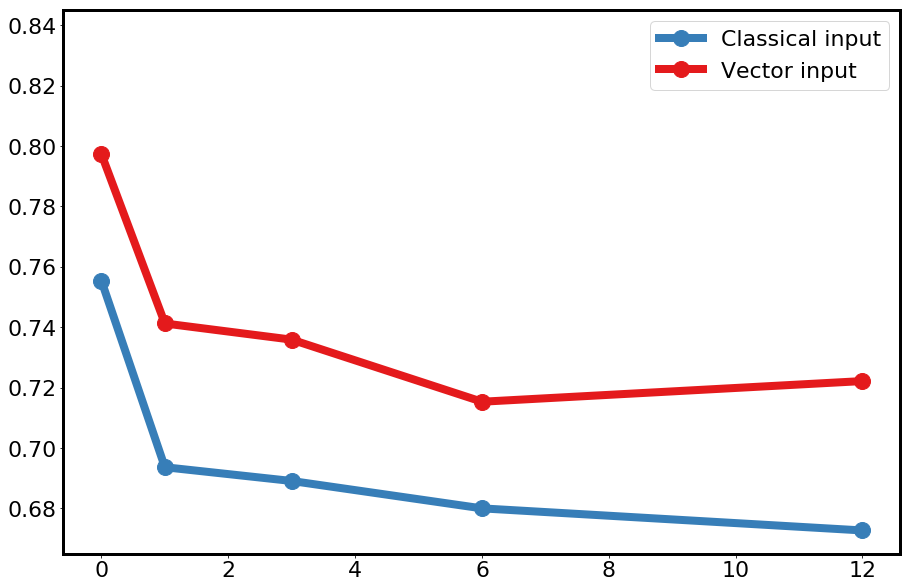

In [6]:
counts_elastic_results = pd.read_csv('../lung_cancer/log/lung_cancer_counts_optimized_elasticnet.log', header=None)
counts_elastic_results.columns = ['Months', 'AUC', 'Logloss']

vectors_elastic_results = pd.read_csv('../lung_cancer/log/lung_cancer_vectors_optimized_elasticnet.log', header=None)
vectors_elastic_results.columns = ['Model', 'Months', 'AUC', 'Logloss']

matplotlib.rcParams.update({'font.size': 22})


vectors_elastic_results_model_groups = vectors_elastic_results.groupby(by='Model')
vactors_elastic_average_auc = pd.DataFrame.from_records([(model, vals['AUC'].mean()) for model, vals in vectors_elastic_results_model_groups], columns=['Model','AUC mean'])
display(vactors_elastic_average_auc.sort_values('AUC mean', ascending=False)[0:1])
top_elastic_models_by_mean = vactors_elastic_average_auc.sort_values('AUC mean', ascending=False)[0:4]['Model'].values


matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)

f = plt.figure()
plt.setp(plt.gca().spines.values(), linewidth=3)
plt.plot(counts_elastic_results['Months'], counts_elastic_results['AUC'], linewidth=8.0, marker="o", ms=16, label='Classical input', color='#377eb8')

for i, model in enumerate(top_elastic_models_by_mean):
    df = vectors_elastic_results_model_groups.get_group(model)
    plt.plot(df['Months'], df['AUC'],  linewidth=8.0, marker="o", label='Vector input', ms=16, color='#E41A1C')
    break
# plt.xlabel('Months before')
# plt.ylabel('AUC')
plt.ylim([0.665, 0.845])
plt.legend(loc='upper right')
plt.show()
f.savefig("images/lung_cancer_elastic.pdf", bbox_inches='tight')

,Model,AUC mean
2,vectors_patient2vec_pvdbow_hs_win-50_emb-100.dill,0.739473


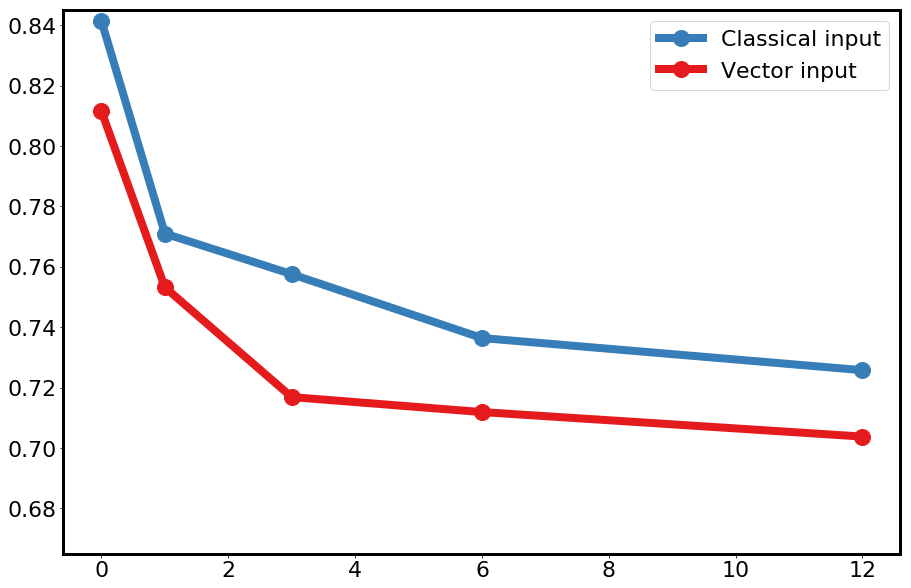

In [7]:
counts_monthly_optim_results = pd.read_csv('../lung_cancer/log/lung_cancer_counts_monthly_optimized_xgb.log', header=None)
counts_monthly_optim_results.columns = ['Months', 'AUC', 'Logloss']


vectors_monthly_optim_results = pd.read_csv('../lung_cancer/log/lung_cancer_vectors_monthly_optimized_xgb.log', header=None)
vectors_monthly_optim_results.columns = ['Model', 'Months', 'AUC', 'Logloss']

display(HTML("<h3>Top vector-based models by average score (avreage for all months)</h3>"))
vectors_monthly_optim_results_model_groups = vectors_monthly_optim_results.groupby(by='Model')
vactors_monthly_optim_average_auc = pd.DataFrame.from_records([(model, vals['AUC'].mean()) for model, vals in vectors_monthly_optim_results_model_groups], columns=['Model','AUC mean'])
display(vactors_monthly_optim_average_auc.sort_values('AUC mean', ascending=False)[0:1])
top_monthly_optim_models_by_mean = vactors_monthly_optim_average_auc.sort_values('AUC mean', ascending=False)[0:5]['Model'].values


matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
f = plt.figure()
plt.setp(plt.gca().spines.values(), linewidth=3)
plt.plot(counts_monthly_optim_results['Months'], counts_monthly_optim_results['AUC'], linewidth=8.0, marker="o", ms=16, label='Classical input', color='#377eb8')

# for i, model in enumerate( np.unique(vectors_monthly_optim_results['Model'].values) ):
for i, model in enumerate(top_monthly_optim_models_by_mean):
    df = vectors_monthly_optim_results_model_groups.get_group(model)
    plt.plot(df['Months'], df['AUC'],  linewidth=8.0, marker="o", label='Vector input', ms=16, color='#E41A1C')
    break
plt.legend(loc='upper right')
# plt.xlabel('Months before')
# plt.ylabel('AUC')
plt.ylim([0.665, 0.845])
plt.show()
f.savefig("images/lung_cancer_xgb.pdf", bbox_inches='tight')